<a href="https://colab.research.google.com/github/harrrshall/LLAMA_-from_scratch/blob/main/fastai00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")



In [ ]:
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai



In [ ]:
!pip install -Uqq duckduckgo_search

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 23.4 MB/s eta 0:00:00


In [ ]:
from duckduckgo_search import DDGS
from fastcore.all import *

def search_images(keywords, max_images= 30):
  print(f"Searching for {keywords}")
  return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')

In [ ]:
urls = search_images('bird photos', max_images=10)
urls[1]

Searching for bird photos


<ipython-input-4-c00f5b57fc9c>:6: UserWarning: DDGS running in an async loop. This may cause errors. Use AsyncDDGS instead.
  return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')


'https://images.alphacoders.com/492/492674.jpg'

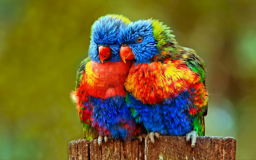

In [ ]:
from fastdownload import download_url
dest = 'bird.jpg'
download_url(urls[1], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for forest photos


<ipython-input-4-c00f5b57fc9c>:6: UserWarning: DDGS running in an async loop. This may cause errors. Use AsyncDDGS instead.
  return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')


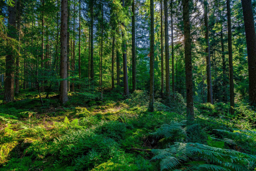

In [ ]:
download_url(search_images('forest photos', max_images=2)[1], 'forest.jpg', show_progress=False)
Image.open('forest.jpg').to_thumb(256,256)

In [ ]:
searches = 'forest','bird'
path = Path('bird_or_not')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for forest photo


<ipython-input-4-c00f5b57fc9c>:6: UserWarning: DDGS running in an async loop. This may cause errors. Use AsyncDDGS instead.
  return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')


Searching for forest sun photo
Searching for forest shade photo
Searching for bird photo
Searching for bird sun photo
Searching for bird shade photo


#Train Our Model

In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

3

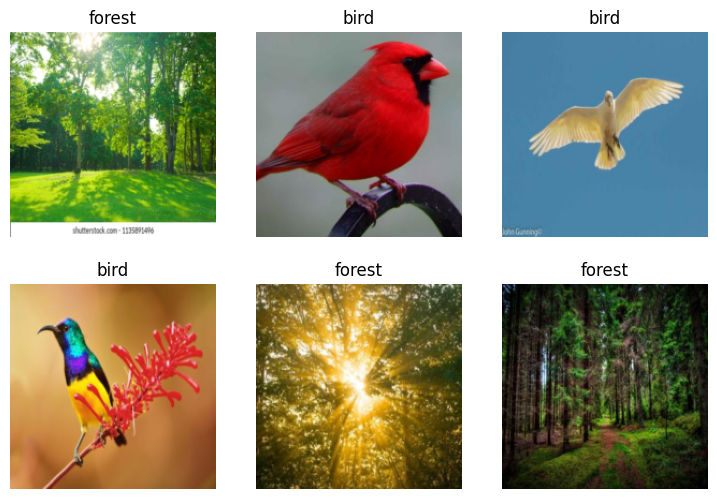

In [ ]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(30)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 145MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.882663,0.498350,0.161290,00:02


epoch,train_loss,valid_loss,error_rate,time
0,0.158750,0.208378,0.032258,00:01
1,0.122983,0.190640,0.032258,00:01
2,0.090282,0.214345,0.032258,00:01
3,0.068355,0.257147,0.032258,00:01
4,0.057084,0.267963,0.032258,00:00
5,0.046083,0.279379,0.032258,00:00
6,0.038731,0.282853,0.032258,00:01
7,0.032514,0.277931,0.032258,00:01
8,0.028113,0.273707,0.032258,00:01
9,0.024245,0.264524,0.032258,00:01


## Step 3: Use our model (and build your own!)

In [ ]:
is_bird,_,probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: bird.
Probability it's a bird: 0.9369
